In [127]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)

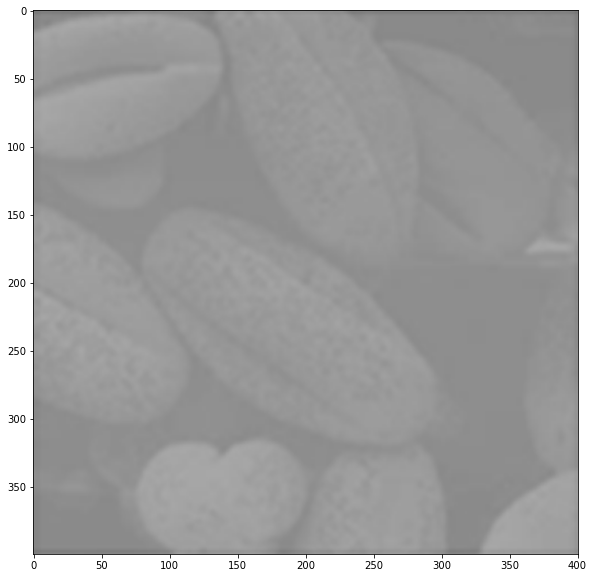

In [128]:
img = cv2.imread(r'images\test-img3.pgm')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.imshow(img)

In [129]:
def watershed( im ):
    water = im.copy()
    for i in range( 0 , im.shape[0]):
        for j in range( 0 , im.shape[1]):
            if im[i][j] > 1:
                try:                                     # [ 1 , 1 , 1 ]
                    for y in range( -1 , 2 ):            # [ 1 , 1 , 1 ]
                        for x in range( -1 , 2 ):        # [ 1 , 1 , 1 ]
                            water[i+x][j+y] = im[i][j]   #     MASK
                except:
                    pass
    return water

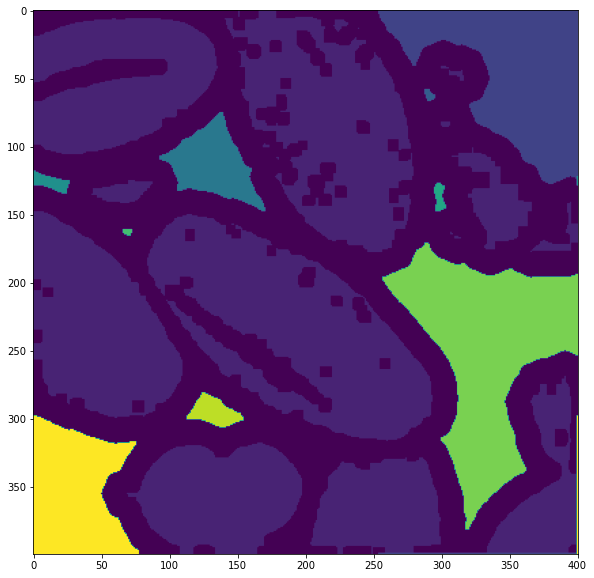

In [130]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#plt.imshow(thresh)

# noise removal
kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel)

#plt.imshow(closing)

# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)

# Threshold
ret, sure_fg = cv2.threshold(dist_transform, 0.2*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

#plt.imshow(sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)

#plt.imshow(markers)
# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = watershed(markers)

plt.imshow(markers)

markers[markers == 0] = -1

img[markers == -1] = [255, 0, 0]

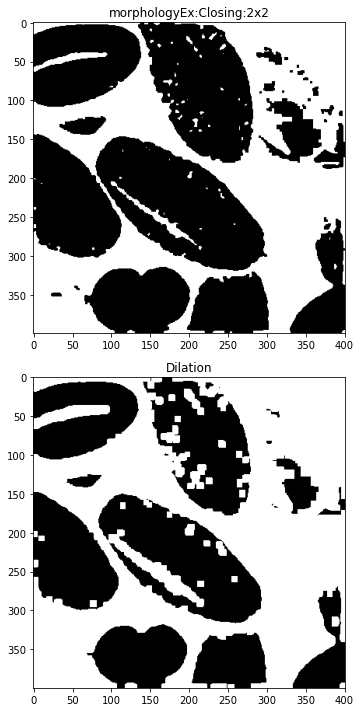

In [131]:
plt.subplot(211)
plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2")

plt.subplot(212)
plt.imshow(sure_bg, 'gray')
plt.title("Dilation")
plt.tight_layout()

plt.show()

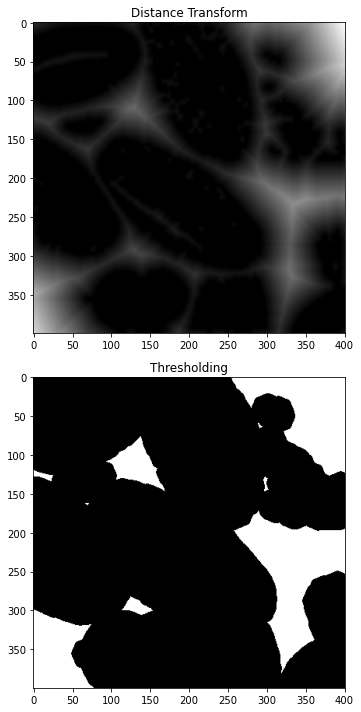

In [132]:
plt.subplot(211)
plt.imshow(dist_transform, 'gray')
plt.title("Distance Transform")

plt.subplot(212)
plt.imshow(sure_fg, 'gray')
plt.title("Thresholding")
plt.tight_layout()

plt.show()

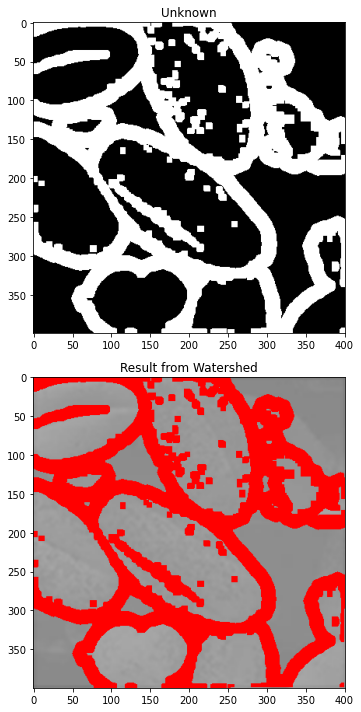

In [133]:
plt.subplot(211)
plt.imshow(unknown, 'gray')
plt.title("Unknown")

plt.subplot(212)
plt.imshow(img, 'gray')
plt.title("Result from Watershed")
plt.tight_layout()

plt.show()